# Pandas Series

NumPy arrays are a much-improved N—dimensional array object version
over Python’s list, but they are still insufficient to meet the needs of data science. In the
real world, data are often presented in table formats. For example, consider the
content of the CSV file shown here

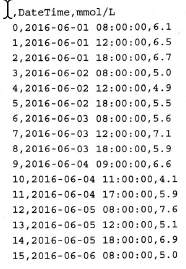

In [3]:
from IPython.display import Image
Image(filename='csv_file.png')

The CSV file contains rows of data that are divided into three columns—
index, date and time of recording, and blood glucose readings in mmol/L. To be
able to deal with data stored as tables, you need a new data type that is more
suited to deal with it—Pandas. While Python supports lists and dictionaries for
manipulating structured data, it is not well suited for manipulating numerical
tables, such as the one stored in the CSV file. Pandas is a Python package providin'g
fast, flexible, and expressive data structures designed to make working with
“relational” or “labeled” data both easy and intuitive.

A Pandas Series is a one-dimensional NumPy—like array, with each element having
an index (0, 1, 2, . . . by default); a Series behaves very much like a dictionary
that includes an index

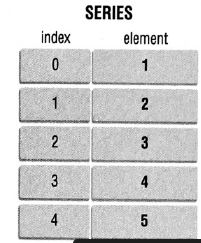

In [4]:
from IPython.display import Image
Image(filename='fig1.png')

To create a Series, you first need to import the pandas library (the convention
is to use pd as the alias) and then use the Series class. By default, the m'dex of a Series starts from 0.

In [5]:
import pandas as pd
series = pd.Series([1,2,3,4,5])
print(series)


0    1
1    2
2    3
3    4
4    5
dtype: int64


## Creating a Series Using a Specified Index

You can specify an optional index for a Series using the index parameter

In [6]:
series = pd.Series([1,2,3,4,5], index=['a','b','c','d','c'])  # note the duplicate index 'c'
print(series)


a    1
b    2
c    3
d    4
c    5
dtype: int64


It is worth noting that the index of a Series need not be unique, as the
preceding output shows.

## Accessing Elements in a Series

Accessing an element in a Series is similar to accessing an element in an array.
You can use the position of the element as follows:

In [7]:
print(series[2])          # 3
# same as
print(series.iloc[2])     # 3  - based on the position of the index


3
3


The iloc indexer allows you to specify an element Via its position.
Alternatively, you can also specify the value of the index of the element you
wish to access like this:

In [8]:
print(series['d'])        # 4
# same as
print(series.loc['d'])    # 4 - based on the label in the index


4
4


The loc indexer allows you to specify the label (value) of an index.
Note that in the preceding two examples, the result is an, integer (which is the type of this Series). What happens if we do the following?

In [10]:
print(series['c'])        # more than 1 row has the index 'c'
#In this case, the result would be another Series

c    3
c    5
dtype: int64


You can also perform slicing on a Series:

In [11]:
print(series[2:])         # returns a Series
print(series.iloc[2:])    # returns a Series


c    3
d    4
c    5
dtype: int64
c    3
d    4
c    5
dtype: int64


## Specifying a Datetime Range as the Index of a Series

Often, you want to create a timeseries, such as a running sequence of dates in
a month. You could use the date _ range () function for this purpose:

In [12]:
dates1 = pd.date_range('20190525', periods=12)
print(dates1)


DatetimeIndex(['2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01',
               '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05'],
              dtype='datetime64[ns]', freq='D')


To assign the range of dates as the index of a Series, use the index property
of the Series like this:

In [13]:
series = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12])
series.index = dates1
print(series)


2019-05-25     1
2019-05-26     2
2019-05-27     3
2019-05-28     4
2019-05-29     5
2019-05-30     6
2019-05-31     7
2019-06-01     8
2019-06-02     9
2019-06-03    10
2019-06-04    11
2019-06-05    12
Freq: D, dtype: int64


## Date Ranges

you saw how to create date ranges using the date _
range () function. The periods parameter specifies how many dates you want
to create, and the default frequency is D (for Daily). If you want to change the
frequency to month, use the freq parameter and set it to M:

In [14]:
dates2 = pd.date_range('2019-05-01', periods=12, freq='M')
print(dates2)


DatetimeIndex(['2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', freq='M')


Notice that when the frequency is set to month, the day of each date will be
the last day of the month. If you want the date to start with the first day of the
month, set the freq parameter to Ms:
For other date frequencies, check out the OffsetAIiases section of the
documentation at:
http://pandas .pydata.org/pandas-docs/stable/timeseries
.html#offset-aliases

In [15]:
dates2 = pd.date_range('2019-05-01', periods=12, freq='MS')
print(dates2)


DatetimeIndex(['2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', freq='MS')


Notice that Pandas automatically interprets the date you specified. In this case, 2019-05-01 1's interpreted as lst May, 2019. In some regions, developers will specify the date in the dd-mm-yyyy format. Thus to represent 5th January, 2019, you would specify it as follows:

In [18]:
dates2 = pd.date_range('05-01-2019', periods=12, freq='MS')
print(dates2)      
#Note however that in this case, Pandas will interpret 05 as the month, 01 as
#the day, and 2019 as the year, as the following output proves:

DatetimeIndex(['2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', freq='MS')


In addition to setting dates, you can also set the time:

In [19]:
dates3 = pd.date_range('2019/05/17 09:00:00', periods=8, freq='H')
print(dates3)


DatetimeIndex(['2019-05-17 09:00:00', '2019-05-17 10:00:00',
               '2019-05-17 11:00:00', '2019-05-17 12:00:00',
               '2019-05-17 13:00:00', '2019-05-17 14:00:00',
               '2019-05-17 15:00:00', '2019-05-17 16:00:00'],
              dtype='datetime64[ns]', freq='H')


If you review each of the code snippets that you have seen here, you
will see that Pandas allows you to specify the date in different formats, such as mmdd-
yyyy, yyyy-mm-dd, and yyyy/mm/dd, and it will automatically try to make sense of
the dates specified. When in doubt, it is always useful to print out the range of dates to
confirm.

# Pandas DataFrame

DataFrame
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. 
Like Series, DataFrame accepts many different kinds of input:
Dict of 1D ndarrays, lists, dicts, or Series
2-D numpy.ndarray
Structured or record ndarray
A Series
Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. 
If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame

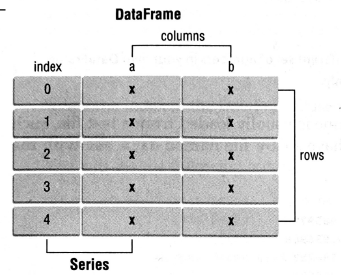

In [21]:
from IPython.display import Image
Image(filename='fig2.png')

A Pandas DataFrame is a two-dimensional NumPy—like array. You can think of
it as a table. Figure 3.2 shows the structure of a DataFrame in Pandas. It also
shows you that an individual column in a DataFrame (together with the index)
is a Series.
A DataFrame is very useful in the world of data science and machine learning,
as it closely mirrors how data are stored in real-life. Imagine the data stored in a
spreadsheet, and you would have a very good Visual impression of a DataFrame.
A Pandas DataFrame is often used when representing data in machine learning.


# Creating a DataFrame

You can create a Pandas DataFrame using the DataFrame() class:
a DataFrame of 10 rows and 4 columns was created, and each cell is filled with a random number using the randn () function.
Each column has a label: ”A’,’ ”B’,’ "C’,’ and “D”:

In [22]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10,4),
                  columns=list('ABCD'))
print(df)


          A         B         C         D
0  0.304267  0.984730 -1.276690 -0.826670
1  0.301880  0.857945  0.594211  0.343866
2  1.830356 -0.837960  0.677253 -0.720387
3  1.484117 -0.237942 -1.027260 -0.544750
4 -0.129672 -0.961970  1.280629  0.002303
5  0.185620  0.535662 -0.680030  0.564152
6 -1.439959 -1.920877 -1.627935  0.418853
7 -0.050493 -0.165147 -1.258124 -1.480213
8  0.559751 -1.399684  1.270258 -0.009567
9 -0.800854  0.669004 -0.391486  0.539468


DataFrame is very useful in the world of data science and machine learning,
as it closely mirrors how data are stored in real-life. Imagine the data stored in a
spreadsheet, and you would have a very good Visual impression of a DataFrame.
A Pandas DataFrame is often used when representing data in machine learning.

## Specifying the Index in a DataFrame

a DataFrame is usually loaded from a text file, such
as a CSV file. Suppose that you have a CSV file named data. csv
You can load the content of the CSV file into a DataFrame using the 
read_csv() function:

Notice that the DataFrame printed in the previous section has an index starting
from 0. This is similar to that of a Series. Like a Series, you can also set the index
for the DataFrame using the index property, as in

In [24]:
df = pd.read_csv('data.csv')                   # load dataframe from CSV file
days = pd.date_range('20190525', periods=10)
df.index = days
print(df)


                   A         B         C         D
2019-05-25  0.187497  1.122150 -0.988277 -1.985934
2019-05-26  0.360803 -0.562243 -0.340693 -0.986988
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-28 -0.279572 -0.702492  0.252265  0.958977
2019-05-29  0.537438 -1.737568  0.714727 -0.939288
2019-05-30  0.070011 -0.516443 -1.655689  0.246721
2019-05-31  0.001268  0.951517  2.107360 -0.108726
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-06-02  0.387023  1.706336 -2.452653  0.260466
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295


To get the index of the DataFrame, use the index property as follows:

In [25]:
print(df.index)


DatetimeIndex(['2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01',
               '2019-06-02', '2019-06-03'],
              dtype='datetime64[ns]', freq='D')


If you want to get the values of the entire DataFrame as a two-dimensional
ndarray, use the values property

In [26]:
print(df.values)


[[ 1.874970e-01  1.122150e+00 -9.882770e-01 -1.985934e+00]
 [ 3.608030e-01 -5.622430e-01 -3.406930e-01 -9.869880e-01]
 [-4.062700e-02  6.733300e-02 -4.529780e-01  6.862230e-01]
 [-2.795720e-01 -7.024920e-01  2.522650e-01  9.589770e-01]
 [ 5.374380e-01 -1.737568e+00  7.147270e-01 -9.392880e-01]
 [ 7.001100e-02 -5.164430e-01 -1.655689e+00  2.467210e-01]
 [ 1.268000e-03  9.515170e-01  2.107360e+00 -1.087260e-01]
 [-1.852580e-01  8.565200e-01 -6.862850e-01  1.104195e+00]
 [ 3.870230e-01  1.706336e+00 -2.452653e+00  2.604660e-01]
 [-1.054974e+00  5.567750e-01 -9.452190e-01 -3.029500e-02]]


# Generating Descriptive Statistics on the DataFrame

The Pandas DataFrame comes with a few useful functions to provide you with
some detailed statistics about the values in the DataFrame. 
You can use the describe() function to get values such as count, mean, standard
deviation, minimum and maximum, as well as the various quartiles:

In [27]:
print(df.describe())


               A          B          C          D
count  10.000000  10.000000  10.000000  10.000000
mean   -0.001639   0.174188  -0.444744  -0.079465
std     0.451656   1.049677   1.267397   0.971164
min    -1.054974  -1.737568  -2.452653  -1.985934
25%    -0.149100  -0.550793  -0.977513  -0.731647
50%     0.035640   0.312054  -0.569632   0.108213
75%     0.317477   0.927768   0.104026   0.579784
max     0.537438   1.706336   2.107360   1.104195


If you simply want to compute the mean in the DataFrame, you can use the
mean() function, indicating the axis:

In [28]:
print(df.mean(0))    # 0 means compute the mean for each columns


A   -0.001639
B    0.174188
C   -0.444744
D   -0.079465
dtype: float64


If you want to get the mean for each row, set the axis to 1

In [29]:
print(df.mean(1))   # 1 means compute the mean for each row


2019-05-25   -0.416141
2019-05-26   -0.382280
2019-05-27    0.064988
2019-05-28    0.057294
2019-05-29   -0.356173
2019-05-30   -0.463850
2019-05-31    0.737855
2019-06-01    0.272293
2019-06-02   -0.024707
2019-06-03   -0.368428
Freq: D, dtype: float64


## Extracting from DataFrames

you learned about NumPy and
how slicing allows you to extract part of a NumPy array. Likewise, in Pandas,
slicing applies to both Series and DataFrames.

Because extracting rows and columns in DataFrames is one of the most common
tasks that you will perform with DataFrames we will walk through the various methods one step at a time so that you have time to digest how they work.

### Selecting the First and Last Five Rows

Sometimes, the DataFrame might be too lengthy, and you just want to take a
glimpse of the first few rows in the DataFrame. For this purpose, you can use
the head() function:

In [30]:
print(df.head())


                   A         B         C         D
2019-05-25  0.187497  1.122150 -0.988277 -1.985934
2019-05-26  0.360803 -0.562243 -0.340693 -0.986988
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-28 -0.279572 -0.702492  0.252265  0.958977
2019-05-29  0.537438 -1.737568  0.714727 -0.939288


If you want more than five rows (or less than five), you can indicate the number
of rows that you want in the head() function as follows:

In [31]:
print(df.head(8))     # prints out the first 8 rows


                   A         B         C         D
2019-05-25  0.187497  1.122150 -0.988277 -1.985934
2019-05-26  0.360803 -0.562243 -0.340693 -0.986988
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-28 -0.279572 -0.702492  0.252265  0.958977
2019-05-29  0.537438 -1.737568  0.714727 -0.939288
2019-05-30  0.070011 -0.516443 -1.655689  0.246721
2019-05-31  0.001268  0.951517  2.107360 -0.108726
2019-06-01 -0.185258  0.856520 -0.686285  1.104195


There is also a tail() function:

In [32]:
print(df.tail())


                   A         B         C         D
2019-05-30  0.070011 -0.516443 -1.655689  0.246721
2019-05-31  0.001268  0.951517  2.107360 -0.108726
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-06-02  0.387023  1.706336 -2.452653  0.260466
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295


Like the head() function, the tail () function allows you to specify the number
of rows to print

In [33]:
print(df.tail(8))     # prints out the last 8 rows


                   A         B         C         D
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-28 -0.279572 -0.702492  0.252265  0.958977
2019-05-29  0.537438 -1.737568  0.714727 -0.939288
2019-05-30  0.070011 -0.516443 -1.655689  0.246721
2019-05-31  0.001268  0.951517  2.107360 -0.108726
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-06-02  0.387023  1.706336 -2.452653  0.260466
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295


### Selecting a Specific Column in a DataFrame

To Obtain one or more columns in a DataFrame, you can specify the column
label as follows:

In [34]:
print(df['A']) #this will print the "A" column together with its index
# same as 
print(df.A)
#this is essentially a series

2019-05-25    0.187497
2019-05-26    0.360803
2019-05-27   -0.040627
2019-05-28   -0.279572
2019-05-29    0.537438
2019-05-30    0.070011
2019-05-31    0.001268
2019-06-01   -0.185258
2019-06-02    0.387023
2019-06-03   -1.054974
Freq: D, Name: A, dtype: float64
2019-05-25    0.187497
2019-05-26    0.360803
2019-05-27   -0.040627
2019-05-28   -0.279572
2019-05-29    0.537438
2019-05-30    0.070011
2019-05-31    0.001268
2019-06-01   -0.185258
2019-06-02    0.387023
2019-06-03   -1.054974
Freq: D, Name: A, dtype: float64


If you want to retreive more than a column, past in a list containing the column labels
It will return a Dataframe

In [35]:
print(df[['A', 'B']])


                   A         B
2019-05-25  0.187497  1.122150
2019-05-26  0.360803 -0.562243
2019-05-27 -0.040627  0.067333
2019-05-28 -0.279572 -0.702492
2019-05-29  0.537438 -1.737568
2019-05-30  0.070011 -0.516443
2019-05-31  0.001268  0.951517
2019-06-01 -0.185258  0.856520
2019-06-02  0.387023  1.706336
2019-06-03 -1.054974  0.556775


### Slicing Based on Row Number

Lets extract a range of rows in the DataFrame

In [36]:
print(df[2:4])
#This extracts row numbers 2 through 4 (not including row 4) from the
#DataFrame, and you should see the following output:

                   A         B         C         D
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-28 -0.279572 -0.702492  0.252265  0.958977


You can also use the iloc indexer for extracting rows based on row number:

In [37]:
print(df.iloc[2:4])      # 2 rows
#This will produce the same output as the preceding code snippet.

                   A         B         C         D
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-28 -0.279572 -0.702492  0.252265  0.958977


Note that if you wish to extract specific rows (and not a range of rows) using
row numbers, you need to use the iloc indexer like this:

In [38]:
print(df.iloc[2:5])      # 3 rows


                   A         B         C         D
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-28 -0.279572 -0.702492  0.252265  0.958977
2019-05-29  0.537438 -1.737568  0.714727 -0.939288


Without using the iloc indexer, the following will not work:
print(df[[2,4]]) # error; need to use the iloc indexer

In [39]:
print(df.iloc[[2,4]])    # 2 rows

                   A         B         C         D
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-29  0.537438 -1.737568  0.714727 -0.939288


The same applies when extracting a single row using a row number; you
need to use iloc:

In [40]:
# print(df[[2,4]])   # error; need to use the iloc indexer
print(df.iloc[2])    # prints out row number 2

A   -0.040627
B    0.067333
C   -0.452978
D    0.686223
Name: 2019-05-27 00:00:00, dtype: float64


### Slicing Based on Row and Column Numbers

If you wish to extract specific rows and columns in a DataFrame, you need to
use the iloc indexer. The following code snippet extracts row numbers 2 to 3,
and column numbers 1 to 3:

In [41]:
print(df.iloc[2:4, 1:4])        # 2 rows, 3 columns
#You should get the following output:

                   B         C         D
2019-05-27  0.067333 -0.452978  0.686223
2019-05-28 -0.702492  0.252265  0.958977


You can also extract specific rows and columns using a list as follows:

In [42]:
print(df.iloc[[2,4], [1,3]])    # 2 rows, 2 columns


                   B         D
2019-05-27  0.067333  0.686223
2019-05-29 -1.737568 -0.939288


The preceding statement prints out row numbers 2 and 4, and column numbers
1 and 3:

To summarize, if you want to extract a range of rows using slicing, you can
simply use the following syntax: df [start _ row: end _ row]. If you want to extract
specific rows or columns, use the iloc indexer: df. iloc [ [row _ 1, row _ 2, . . ., row
_ n] , [column _ 1,Column _ 2, . . . , column _ n]].

### Slicing Based on Labels

Besides extracting rows and columns usm'g their row and column numbers, you
can also extract them by label (value). For example, the following code snippet
extracts a range of rows usm'g their index values (which is of Datet imeIndex type):

In [43]:
print(df['20190601':'20190603'])


                   A         B         C         D
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-06-02  0.387023  1.706336 -2.452653  0.260466
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295


You can also use the loc indexer as follows:

In [44]:
print(df.loc['20190601':'20190603'])
#The preceding statement prints out row numbers 2 and 4, and column numbers
#1 and 3:

                   A         B         C         D
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-06-02  0.387023  1.706336 -2.452653  0.260466
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295


Using the loc indexer is mandatory if you want to extract the columns using
their values, as the following example shows:

In [45]:
print(df.loc['20190601':'20190603', 'A':'C'])


                   A         B         C
2019-06-01 -0.185258  0.856520 -0.686285
2019-06-02  0.387023  1.706336 -2.452653
2019-06-03 -1.054974  0.556775 -0.945219


Unlike slicing by number, where startzend means extracting row start through
row end but not including end, slicing by value will include the end row

In [46]:
print(df.loc['20190601':'20190603', ['A','C']])


                   A         C
2019-06-01 -0.185258 -0.686285
2019-06-02  0.387023 -2.452653
2019-06-03 -1.054974 -0.945219


If you want to extract a specific row, use the loc indexer as follows:

In [47]:
print(df.loc['20190601'])


A   -0.185258
B    0.856520
C   -0.686285
D    1.104195
Name: 2019-06-01 00:00:00, dtype: float64


Oddly, if you want to extract spec1f1"c rows with datetime as the index, you
cannot simply pass the date value to the loc indexer as follows:

In [48]:
# print(df.loc[['20190601','20190603']])   # KeyError


First, you need to convert the date into a datetime format:

In [49]:
from datetime import datetime
date1 = datetime(2019, 6, 1, 0, 0, 0)
date2 = datetime(2019, 6, 3, 0, 0, 0)
print(df.loc[[date1,date2]])


                   A         B         C         D
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295


If you want a specific row and specific columns, you can extract them as follows:

In [50]:
print(df.loc[date1, ['A','C']])


A   -0.185258
C   -0.686285
Name: 2019-06-01 00:00:00, dtype: float64


In the preceding example, because there is only a single specified date, the
result is a Series.

To summarize, if you want to extract a range of rows using their labels, you can
simply use the following syntax: df [start _ labelzend _ label]. If you want to
extract specific rows or columns, use the loc indexer with the following syntax: df
.loc[[row_ l __ label,row _ 2 _ label, . . .,row _ n _ label], [column _ l _
label, column _ 2 _ label, . . . , column _ n _ label] ].

## Selecting a Single Cell in a DataFrame

If you simply wish to access a single cell in a DataFrame, there is a function that
does just that: at(). Using the same example as in the previous section, if you
want to get the value of a specific cell, you can use the following code snippet:

In [51]:
from datetime import datetime
d = datetime(2019, 6, 3, 0, 0, 0)
print(df.at[d,'B'])


0.556775


## Selecting Based on Cell Value

If you want to select a subset of the DataFrame based on certain values in the
cells, you can use the Boolean Indexing method, as described in Chapter 2. The
following code snippet prints out all of the rows that have positive values in
the A and B columns:

In [52]:
print(df[(df.A > 0) & (df.B>0)])


                   A         B         C         D
2019-05-25  0.187497  1.122150 -0.988277 -1.985934
2019-05-31  0.001268  0.951517  2.107360 -0.108726
2019-06-02  0.387023  1.706336 -2.452653  0.260466


## Transforming DataFrames

If you need to reflect the DataFrame over its main diagonal (converting columns
to rows and rows to columns), you can use the transpose( ) function:

In [53]:
print(df.transpose())


   2019-05-25  2019-05-26  2019-05-27  2019-05-28  2019-05-29  2019-05-30  \
A    0.187497    0.360803   -0.040627   -0.279572    0.537438    0.070011   
B    1.122150   -0.562243    0.067333   -0.702492   -1.737568   -0.516443   
C   -0.988277   -0.340693   -0.452978    0.252265    0.714727   -1.655689   
D   -1.985934   -0.986988    0.686223    0.958977   -0.939288    0.246721   

   2019-05-31  2019-06-01  2019-06-02  2019-06-03  
A    0.001268   -0.185258    0.387023   -1.054974  
B    0.951517    0.856520    1.706336    0.556775  
C    2.107360   -0.686285   -2.452653   -0.945219  
D   -0.108726    1.104195    0.260466   -0.030295  


Alternatively, you can just use the T property, which is an accessor to the
transpose () function:

In [54]:
print(df.T)


   2019-05-25  2019-05-26  2019-05-27  2019-05-28  2019-05-29  2019-05-30  \
A    0.187497    0.360803   -0.040627   -0.279572    0.537438    0.070011   
B    1.122150   -0.562243    0.067333   -0.702492   -1.737568   -0.516443   
C   -0.988277   -0.340693   -0.452978    0.252265    0.714727   -1.655689   
D   -1.985934   -0.986988    0.686223    0.958977   -0.939288    0.246721   

   2019-05-31  2019-06-01  2019-06-02  2019-06-03  
A    0.001268   -0.185258    0.387023   -1.054974  
B    0.951517    0.856520    1.706336    0.556775  
C    2.107360   -0.686285   -2.452653   -0.945219  
D   -0.108726    1.104195    0.260466   -0.030295  


# Checking to See If a Result Is a DataFrame or Series

One of the common problems that you will face with Pandas is knowing if the
result that you have obtained is a Series or a DataFrame. To solve this mystery,
here is a function that can make your life easier:

In [55]:
def checkSeriesOrDataframe(var):
    if isinstance(var, pd.DataFrame):
        return 'Dataframe'
    if isinstance(var, pd.Series):
        return 'Series'


## Sorting Data in a DataFrame

There are two ways that you can sort the data in a DataFrame:
1. Sort by labels (axis) using the sort _ index() function
2. Sort by value using the sort _ values() function

### Sorting by Index

To sort by value, use the sort _ values () function. The following statement sorts the DataFrame based on the values in column ’A’:

In [57]:
print(df.sort_index(axis=0, ascending=False))  # axis = 0 means sort by
                                               # index
#Based on the preceding statement, the DataFrame is now sorted according
#to the index in descending order:

                   A         B         C         D
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295
2019-06-02  0.387023  1.706336 -2.452653  0.260466
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-05-31  0.001268  0.951517  2.107360 -0.108726
2019-05-30  0.070011 -0.516443 -1.655689  0.246721
2019-05-29  0.537438 -1.737568  0.714727 -0.939288
2019-05-28 -0.279572 -0.702492  0.252265  0.958977
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-26  0.360803 -0.562243 -0.340693 -0.986988
2019-05-25  0.187497  1.122150 -0.988277 -1.985934


Note that the sort __ index() function returns the sorted DataFrame. The
original DataFrame is not affected. If you want the original DataFrame to be sorted,
use the inplace parameter and set it to True. In general, most operations involving
DataFrames do not alter the original DataFrame. So inplace is by default set to
False. When inplace is set to True, the function returns None as the result.

Setting the axis parameter to 1 indicates that you want to sort by column labels:

In [58]:
print(df.sort_index(axis=1, ascending=False))  # axis = 1 means sort by
                                               # column
#The DataFrame is now sorted based on the column labels (in descendm'g order):

                   D         C         B         A
2019-05-25 -1.985934 -0.988277  1.122150  0.187497
2019-05-26 -0.986988 -0.340693 -0.562243  0.360803
2019-05-27  0.686223 -0.452978  0.067333 -0.040627
2019-05-28  0.958977  0.252265 -0.702492 -0.279572
2019-05-29 -0.939288  0.714727 -1.737568  0.537438
2019-05-30  0.246721 -1.655689 -0.516443  0.070011
2019-05-31 -0.108726  2.107360  0.951517  0.001268
2019-06-01  1.104195 -0.686285  0.856520 -0.185258
2019-06-02  0.260466 -2.452653  1.706336  0.387023
2019-06-03 -0.030295 -0.945219  0.556775 -1.054974


### Sorting by Value

To sort by value, use the sort _ values () function. The following statement sorts
the DataFrame based on the values in column ’A’”:

In [61]:
print(df.sort_values('A', axis=0))
#The output now is now sorted (in ascending order) based on the value of
#column ’A’” (the values are highlighted). Notice that the index is now jumbled up:

                   A         B         C         D
2019-06-03 -1.054974  0.556775 -0.945219 -0.030295
2019-05-28 -0.279572 -0.702492  0.252265  0.958977
2019-06-01 -0.185258  0.856520 -0.686285  1.104195
2019-05-27 -0.040627  0.067333 -0.452978  0.686223
2019-05-31  0.001268  0.951517  2.107360 -0.108726
2019-05-30  0.070011 -0.516443 -1.655689  0.246721
2019-05-25  0.187497  1.122150 -0.988277 -1.985934
2019-05-26  0.360803 -0.562243 -0.340693 -0.986988
2019-06-02  0.387023  1.706336 -2.452653  0.260466
2019-05-29  0.537438 -1.737568  0.714727 -0.939288


To sort based on a particular index, set the axis parameter to 1:

In [62]:
print(df.sort_values('20190601', axis=1))


                   C         A         B         D
2019-05-25 -0.988277  0.187497  1.122150 -1.985934
2019-05-26 -0.340693  0.360803 -0.562243 -0.986988
2019-05-27 -0.452978 -0.040627  0.067333  0.686223
2019-05-28  0.252265 -0.279572 -0.702492  0.958977
2019-05-29  0.714727  0.537438 -1.737568 -0.939288
2019-05-30 -1.655689  0.070011 -0.516443  0.246721
2019-05-31  2.107360  0.001268  0.951517 -0.108726
2019-06-01 -0.686285 -0.185258  0.856520  1.104195
2019-06-02 -2.452653  0.387023  1.706336  0.260466
2019-06-03 -0.945219 -1.054974  0.556775 -0.030295


## Applying Functions to a DataFrame

You can also apply functions to values in a DataFrame using the apply () function.
First, let’s define two lambda functions as follows:

In [63]:
import math
sq_root = lambda x: math.sqrt(x) if x > 0 else x
sq      = lambda x: x**2


The first function, sq _ root(), takes the square root of the value x if it is a
positive number. The second function, sq(), takes the square of the value x.
It is important to note that objects passed to the apply() function are Series
objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s
columns (axis=l).
We can now apply the functions to the DataFrame. First, apply the sq _ root ()
function to column “B”:

Since the result of df.B is a Series, we can apply the sq _ root () function to
it and it will return the following results:

In [64]:
print(df.B.apply(sq_root))


2019-05-25    1.059316
2019-05-26   -0.562243
2019-05-27    0.259486
2019-05-28   -0.702492
2019-05-29   -1.737568
2019-05-30   -0.516443
2019-05-31    0.975457
2019-06-01    0.925484
2019-06-02    1.306268
2019-06-03    0.746174
Freq: D, Name: B, dtype: float64


You can also apply the sq() function to df .B:

In [66]:
print(df.B.apply(sq))


2019-05-25    1.259221
2019-05-26    0.316117
2019-05-27    0.004534
2019-05-28    0.493495
2019-05-29    3.019143
2019-05-30    0.266713
2019-05-31    0.905385
2019-06-01    0.733627
2019-06-02    2.911583
2019-06-03    0.309998
Freq: D, Name: B, dtype: float64


If you apply the sq _ root ( ) function to the DataFrame as shown here,

In [67]:
# df.apply(sq_root)    # ValueError


you will get the following error:
ValueError.- ('The truth value of a Serl'es 1's aM1'guous. Use a.empty,
a.bool(), a 1'tem(), a.any() or a.all().', 'occurred at 1'ndex A')
This is because the object passed into the apply( ) function in this case is a
DataFrame, not a Series. Interestingly, you can apply the sq() function to the
DataFrame:

In [68]:
df.apply(sq)    


,A,B,C,D
2019-05-25,0.035155,1.259221,0.976691,3.943934
2019-05-26,0.130179,0.316117,0.116072,0.974145
2019-05-27,0.001651,0.004534,0.205189,0.470902
2019-05-28,0.078161,0.493495,0.063638,0.919637
2019-05-29,0.288840,3.019143,0.510835,0.882262
2019-05-30,0.004902,0.266713,2.741306,0.060871
2019-05-31,0.000002,0.905385,4.440966,0.011821
2019-06-01,0.034321,0.733627,0.470987,1.219247
2019-06-02,0.149787,2.911583,6.015507,0.067843
2019-06-03,1.112970,0.309998,0.893439,0.000918


If you want to apply the sq _ root() function to the entire DataFrame, you
can iterate through the columns and apply the function to each column:

In [69]:
for column in df:
    df[column] = df[column].apply(sq_root)
print(df)


                   A         B         C         D
2019-05-25  0.433009  1.059316 -0.988277 -1.985934
2019-05-26  0.600669 -0.562243 -0.340693 -0.986988
2019-05-27 -0.040627  0.259486 -0.452978  0.828386
2019-05-28 -0.279572 -0.702492  0.502260  0.979274
2019-05-29  0.733102 -1.737568  0.845415 -0.939288
2019-05-30  0.264596 -0.516443 -1.655689  0.496710
2019-05-31  0.035609  0.975457  1.451675 -0.108726
2019-06-01 -0.185258  0.925484 -0.686285  1.050807
2019-06-02  0.622112  1.306268 -2.452653  0.510359
2019-06-03 -1.054974  0.746174 -0.945219 -0.030295


The app1y() function can be applied on either axis: index (0; apply function to
each column) or column (1; apply function to each row). For the two particular
lambda functions that we have seen thus far, it does not matter which axis you
apply it to, and the result would be the same. However, for some functions, the
axis that you apply it to does matter. For example, the following statement uses
the sum() function from NumPy and applies it to the rows of the DataFrame:

Essentially, you are summing up all of the values in each column. You should
see the following:

In [70]:
print(df.apply(np.sum, axis=0))


A    1.128665
B    1.753438
C   -4.722444
D   -0.185696
dtype: float64


If you set axis to 1 as follows,

In [71]:
print(df.apply(np.sum, axis=1))


2019-05-25   -1.481886
2019-05-26   -1.289255
2019-05-27    0.594267
2019-05-28    0.499470
2019-05-29   -1.098339
2019-05-30   -1.410826
2019-05-31    2.354015
2019-06-01    1.104747
2019-06-02   -0.013915
2019-06-03   -1.284314
Freq: D, dtype: float64


## Adding and Removing Rows and Columns in a DataFrame

So far, all of the previous sections have involved extracting rows and columns
from DataFrames, as well as how to sort DataFrames. In this section, we will
focus on how to add and remove columns in DataFrames.
Consider the following code snippet, where a DataFrame is created from a
dictionary:

In [72]:
import pandas as pd

data = {'name': ['Janet', 'Nad', 'Timothy', 'June', 'Amy'],
        'year': [2012, 2012, 2013, 2014, 2014],
        'reports': [6, 13, 14, 1, 7]}

df = pd.DataFrame(data, index =
       ['Singapore', 'China', 'Japan', 'Sweden', 'Norway'])
print(df)


              name  year  reports
Singapore    Janet  2012        6
China          Nad  2012       13
Japan      Timothy  2013       14
Sweden        June  2014        1
Norway         Amy  2014        7


### Adding a Column

The followm'g code snippet shows you how to add a new column named "schoo ”
to the DataFrame:

In [73]:
import numpy as np

schools = np.array(["Cambridge","Oxford","Oxford","Cambridge","Oxford"])
df["school"] = schools
print(df)


              name  year  reports     school
Singapore    Janet  2012        6  Cambridge
China          Nad  2012       13     Oxford
Japan      Timothy  2013       14     Oxford
Sweden        June  2014        1  Cambridge
Norway         Amy  2014        7     Oxford


### Removing Rows

To remove one or more rows, use the drop () function. The following code snippet
removes the two rows whose index value is “China” and “Japan”:

In [74]:
print(df.drop(['China', 'Japan']))  # drop rows based on value of index


            name  year  reports     school
Singapore  Janet  2012        6  Cambridge
Sweden      June  2014        1  Cambridge
Norway       Amy  2014        7     Oxford


Like the sort _ index() function, by default the drop() function does not
affect the original DataFrame. Use the inplace parameter if you want to modify the
original DataFrame.
If you want to drop a row based on a particular column value, specify the
column name and the condition like this:

In [75]:
print(df[df.name != 'Nad'])         # drop row based on column value


              name  year  reports     school
Singapore    Janet  2012        6  Cambridge
Japan      Timothy  2013       14     Oxford
Sweden        June  2014        1  Cambridge
Norway         Amy  2014        7     Oxford


You can remove rows based on row number

In [76]:
print(df.drop(df.index[1]))
# same as df.drop['China']


              name  year  reports     school
Singapore    Janet  2012        6  Cambridge
Japan      Timothy  2013       14     Oxford
Sweden        June  2014        1  Cambridge
Norway         Amy  2014        7     Oxford


Since df.index[l] returns ”Ch1-na’,’ the precedi'ng 5tatement is equivalentt0
df.drop['China']. I
If you want to drop multiple rows, spec1fy the row numbers represented as
a list:

In [77]:
print(df.drop(df.index[[1,2]]))     # remove the second and third row


            name  year  reports     school
Singapore  Janet  2012        6  Cambridge
Sweden      June  2014        1  Cambridge
Norway       Amy  2014        7     Oxford


The preceding statement removes row numbers 1 and 2 (the second and the third row):

In [78]:
print(df.drop(df.index[-2]))        # remove second last row


              name  year  reports     school
Singapore    Janet  2012        6  Cambridge
China          Nad  2012       13     Oxford
Japan      Timothy  2013       14     Oxford
Norway         Amy  2014        7     Oxford


### Removing Columns

The drop() function drops rows by default but if you want to drop columns instead, set the axis parameter to 1 like this

In [79]:
print(df.drop('reports', axis=1))   # drop column


              name  year     school
Singapore    Janet  2012  Cambridge
China          Nad  2012     Oxford
Japan      Timothy  2013     Oxford
Sweden        June  2014  Cambridge
Norway         Amy  2014     Oxford


If you want to drop by column number, specify the column number using
the columns indexer:

In [80]:
print(df.drop(df.columns[1], axis=1))       # drop using columns number


              name  reports     school
Singapore    Janet        6  Cambridge
China          Nad       13     Oxford
Japan      Timothy       14     Oxford
Sweden        June        1  Cambridge
Norway         Amy        7     Oxford


You can also drop multiple columns:
This will drop the second and fourth columns (”reports” and "school”):

In [81]:
print(df.drop(df.columns[[1,3]], axis=1))   # drop multiple columns


              name  reports
Singapore    Janet        6
China          Nad       13
Japan      Timothy       14
Sweden        June        1
Norway         Amy        7


### Generating a Crosstab

In statistics, a crosstab is used to aggregate and jointly display the distribution
of two or more variables. It shows the relationships between these variables.
Consider the following example:

In [82]:
df = pd.DataFrame(
    {
        "Gender": ['Male','Male','Female','Female','Female'],
        "Team"  : [1,2,3,3,1]
    })
print(df)


   Gender  Team
0    Male     1
1    Male     2
2  Female     3
3  Female     3
4  Female     1


This DataFrame shows the gender of each person and the team to which the
person belongs. Using a crosstab, you would be able to summarize the data and
generate a table to show the distribution of each gender for each team. To do
that, you use the crosstab() function:

In [83]:
print("Displaying the distribution of genders in each team")
print(pd.crosstab(df.Gender, df.Team))


Displaying the distribution of genders in each team
Team    1  2  3
Gender         
Female  1  0  2
Male    1  1  0


If you want to see the distribution of each team for each gender, you simply reverse the argument:

In [86]:
print(pd.crosstab(df.Team, df.Gender))


Gender  Female  Male
Team                
1            1     1
2            0     1
3            2     0


you witnessed the use of Pandas to represent tabular data. You
learned about the two main Pandas data structures: Series and DataFrame. I
attempted to keep things simple and to show you some of the most common
operations that you would perform on these data structures. As extracting
rows and columns from DataFrames is so common.